In [8]:
import requests
import json
from matplotlib import pyplot as plt
import pandas as pd
from lxml import html
from bs4 import BeautifulSoup
import atlasopenmagic as atom
import sys
from pathlib import Path
project_root = Path.cwd().parent   # one level up
sys.path.insert(0, str(project_root))

from src.parse_atlas import parser

CMS_DATASET_URL = f"https://opendata.cern.ch/search?q=&f=experiment%3ACMS&f=type%3ADataset%2Bsubtype%3ACollision&l=grid&order=desc&p=1&s=342&sort=mostrecent"
CMS_API_DATASET_URL = f"https://opendata.cern.ch/api/records/?q=&sort=-mostrecent&page=1&size=290&skip_files=1&experiment=CMS&type=Dataset%3A%3ACollision"

In [11]:
rec_id = 30512
def fetch_uris_from_specific_record_ids(specific_record_ids, timeout=60) -> dict:
    j = 0
    files_set = set()
    for record_id in specific_record_ids:
        r = requests.get(f"https://opendata.cern.ch/record/{record_id}/filepage/1?group=8")
        json_r = json.loads(r.text)
        for file in json_r["index_files"]["files"]:
            for f in file["files"]:
                j+=1
                files_set.add(f["uri"])
    print(j)
    print(len(files_set))
fetch_uris_from_specific_record_ids([30512])



1257
1257


In [ ]:
atlasparser = parser.AtlasOpenParser(
    chunk_yield_threshold_bytes=100000000,
    max_threads=1,
    logging_path=None,
    specific_record_ids=[30512, 30546],
    possible_tree_names=["CollectionTree","Events"],
    )

release_years_file_ids = atlasparser.fetch_record_ids()

# if pipeline_config["limit_files_per_year"]:
#     parser.AtlasOpenParser.limit_files_per_year(release_years_file_ids, pipeline_config["limit_files_per_year"])


saved_files = []  # Track successfully saved ROOT files for IM pipeline
import os

for events_chunk in atlasparser.parse_files(
    release_years_file_ids=release_years_file_ids,
    save_statistics=True
):
    pass


Parsing files:   8%|▊         | 192/2521 [09:25<1:54:21,  2.95s/file, ✅ 0 | ❌ 0 | ✨ 0.0% | 💾 0.0 MB | 🎯 0 events]


In [4]:
r = requests.get(CMS_API_DATASET_URL)

,title,recid,count_triggers,entries_stats
71,/PAMinBiasUPC/HIRun2013-PromptReco-v1/RECO,24657,46,286814246
74,/PAHighPt/HIRun2013-PromptReco-v1/RECO,24655,73,222789339
160,/ZeroBias/Run2015D-16Dec2015-v1/MINIAOD,24116,0,197823706
177,/ZeroBias/Run2015D-16Dec2015-v1/AOD,24133,0,197715989
19,/SingleMuon/Run2016H-UL2016_MiniAODv2-v2/MINIAOD,30563,61,174035164
2,/SingleMuon/Run2016H-UL2016_MiniAODv2_NanoAODv...,30546,61,174035164
53,/SingleElectron/Run2016G-UL2016_MiniAODv2-v2/M...,30529,50,153363109
36,/SingleElectron/Run2016G-UL2016_MiniAODv2_Nano...,30512,50,153363109
52,/SingleMuon/Run2016G-UL2016_MiniAODv2-v2/MINIAOD,30530,61,149916849
35,/SingleMuon/Run2016G-UL2016_MiniAODv2_NanoAODv...,30513,61,149916849


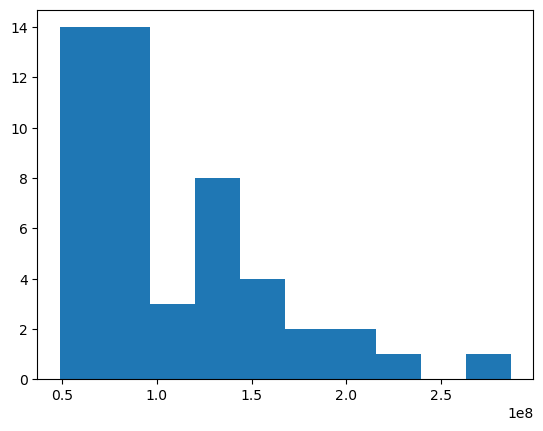

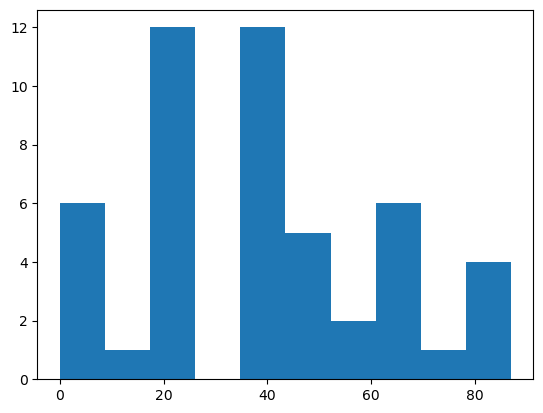

In [5]:
a = json.loads(r.text)
interesting_fields = ['relations', 'distribution', 'collision_information']
records = []
for hit in a['hits']['hits']:

    metadata = hit['metadata']
    desc = metadata['methodology']['description']
    desc = desc.split('The possible ')[-1]
    soup = BeautifulSoup(desc, 'html.parser')
    a_tags = soup.find_all('a')
    trigger_names = []
    for a_tag in a_tags:
        trigger_names.append(a_tag.text.strip())
    trigger_names = list(set(trigger_names))[1:]
    record = {}

    record['trigger_names'] = trigger_names
    if 'title' in metadata:
        record['title'] = metadata['title']
    if 'relations' in metadata:
        if 'recid' in metadata['relations'][0]:
            record['recid'] = metadata['relations'][0]['recid']
    if 'distribution' in metadata:
        record['entries_stats'] = int(metadata['distribution']['number_events'])
    if 'collision_information' in metadata:
        record['energy'] = metadata['collision_information']['energy']
        record['collision'] = metadata['collision_information']['type']
    
    records.append(record)

df = pd.DataFrame(records)

df = df[df['recid'].notna()]
df['count_triggers'] = df['trigger_names'].apply(len)

df = (df
    # .sort_values('count_triggers', ascending=False).loc[:10]
    .sort_values('entries_stats', ascending=False).loc[:10]
)

display(df[['title', 'recid', 'count_triggers', 'entries_stats']])

plt.hist(df['entries_stats'], bins=10)
plt.show()

plt.hist(df['count_triggers'], bins=10)
plt.show()
